# Evaluation Project 14
Restaurant Food

In [4]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

We have a dataset regarding the cost of the food served by the restaurants across different cities in India. We need to create a model to predict the cost of the food served by the restaurants.

In [5]:
#creating a dataframe from the csv file
ds_train=pd.read_excel('Data_Train.xlsx')           #train dataset

In [6]:
ds_test=pd.read_excel('Data_Test.xlsx')             #test dataset

In [7]:
#let see the training dataset
ds_train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [8]:
#lets see the info of train dataset
ds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


Except Restaurant_id and Cost all others are of object datatype. we need to convert them in future for our anlaysis.

In [9]:
#lets see the columns
ds_train.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

#### Column Description:-
1. TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.
2. RESTAURANT_ID: A unique ID for each restaurant.
3. CUISINES: The variety of cuisines that the restaurant offers.
4. TIME: The open hours of the restaurant.
5. CITY: The city in which the restaurant is located.
6. LOCALITY: The locality of the restaurant.
7. RATING: The average rating of the restaurant by customers.
8. VOTES: The overall votes received by the restaurant.
9. COST: The average cost of a two-person meal.


In [10]:
#lets check for missing values
#training set
print(ds_train.isnull().sum())
print('\n')
#testing set 
print(ds_test.isnull().sum())

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64


TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64


In [11]:
#lets fill the missing city and locality names with 'Others'.
list=['CITY','LOCALITY']
for i in list:
    ds_train[i].fillna('Others',inplace=True)
    ds_test[i].fillna('Others',inplace=True)

In [12]:
#lets fill the missing ratings and votes with 0
list=['RATING','VOTES']
for i in list:
    ds_train[i].fillna(0,inplace=True)
    ds_test[i].fillna(0,inplace=True)

In [13]:
#Now lets check for any missing values
#training set
print(ds_train.isnull().sum())
print('\n')
#testing set 
print(ds_test.isnull().sum())

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64


TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64


Missing values have been handled lest check for the unique values.

In [14]:
#training set
for i in ds_train.columns:
    print(ds_train[i].value_counts())
    print('********************************')
    print('\n')

QUICK BITES                 4218
CASUAL DINING               3652
None                        1003
CAFÉ                         607
DESSERT PARLOR               382
                            ... 
DESSERT PARLOR,KIOSK           1
BAKERY,CONFECTIONERY           1
SWEET SHOP,CONFECTIONERY       1
DESSERT PARLOR,PAAN SHOP       1
QUICK BITES,BAR                1
Name: TITLE, Length: 113, dtype: int64
********************************


7264     8
4634     7
9910     6
13173    5
1571     5
        ..
461      1
2508     1
14794    1
10696    1
0        1
Name: RESTAURANT_ID, Length: 11892, dtype: int64
********************************


South Indian                                                      532
North Indian                                                      526
North Indian, Chinese                                             501
Fast Food                                                         286
Chinese                                                           167
        

In [15]:
#testing set
for i in ds_test.columns:
    print(ds_test[i].value_counts())
    print('********************************')
    print('\n')

QUICK BITES                   1416
CASUAL DINING                 1258
None                           284
CAFÉ                           223
DESSERT PARLOR                 126
                              ... 
LOUNGE,CLUB                      1
FOOD TRUCK,DESSERT PARLOR        1
CAFÉ,LOUNGE                      1
CASUAL DINING,MICROBREWERY       1
QUICK BITES,CAFÉ                 1
Name: TITLE, Length: 86, dtype: int64
********************************


12799    3
15454    3
4262     3
11169    3
1619     3
        ..
9598     1
11432    1
3451     1
5496     1
10241    1
Name: RESTAURANT_ID, Length: 4127, dtype: int64
********************************


North Indian, Chinese                                                        213
North Indian                                                                 190
South Indian                                                                 174
Fast Food                                                                     78
Chinese       

In RATING we can see that there are two non numeric values: NEW, - ,.So lets replace them with 0


In [16]:
#replacing
ds_train['RATING'].replace(['NEW','-'],0,inplace=True)
ds_test['RATING'].replace(['NEW','-'],0,inplace=True)
#type casting
ds_train['RATING']=ds_train['RATING'].astype('float')
ds_test['RATING']=ds_test['RATING'].astype('float')                    

In [17]:
#converting votes into integers
#training dataset
ds_train['VOTES']=ds_train['VOTES'].str.split()
ds_train['VOTES']=ds_train['VOTES'].str[0].astype('float')
#testing dataset
ds_test['VOTES']=ds_test['VOTES'].str.split()
ds_test['VOTES']=ds_test['VOTES'].str[0].astype('float')

In [18]:
#after conversion nan values are still coming.
ds_train['VOTES'].fillna(0,inplace=True)
ds_test['VOTES'].fillna(0,inplace=True)

In [19]:
#checking the dataset
ds_train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546.0,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214.0,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608.0,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32.0,400


In [20]:
#finding the maximum and minimum number of titles within a restaurant.
dat_train = ds_train.TITLE.apply(lambda x: len(x.split(',')))
print("Maximum titles within a restaurant in the Train dataset is {}\n".format(dat_train.max()))
print("And the title is --> {}\n\n".format(ds_train.TITLE[dat_train.idxmax()]))
print("Minimum titles within a restaurant in the Train dataset is {}\n".format(dat_train.min()))
print("And the title is --> {}\n\n".format(ds_train.TITLE[dat_train.idxmin()]))

# Test set
dat_test = ds_test.TITLE.apply(lambda x: len(x.split(',')))
print("Maximum titles within a restaurant in the Test dataset is {}\n".format(dat_test.max()))
print("And the title is --> {}\n\n".format(ds_test.TITLE[dat_test.idxmax()]))
print("Minimum titles within a restaurant in the Test dataset is {}\n".format(dat_test.min()))
print("And the title is --> {}".format(ds_test.TITLE[dat_test.idxmin()]))

Maximum titles within a restaurant in the Train dataset is 2

And the title is --> CASUAL DINING,BAR


Minimum titles within a restaurant in the Train dataset is 1

And the title is --> CASUAL DINING


Maximum titles within a restaurant in the Test dataset is 2

And the title is --> FOOD TRUCK,DESSERT PARLOR


Minimum titles within a restaurant in the Test dataset is 1

And the title is --> CASUAL DINING


In [21]:
#splitting the titles in the dataset
#training datatset
ds_train['TITLE_1'] = ds_train['TITLE'].str.split(',').str[0]
ds_train['TITLE_2'] = ds_train['TITLE'].str.split(',').str[1]
#testing dataset
ds_test['TITLE_1'] = ds_test['TITLE'].str.split(',').str[0]
ds_test['TITLE_2'] = ds_test['TITLE'].str.split(',').str[1]

In [22]:
#dropping the main title column
ds_train.drop(columns='TITLE',axis=1,inplace=True)
ds_test.drop(columns='TITLE',axis=1,inplace=True)
#filling the missing columns with none
ds_train['TITLE_2'].fillna('None',inplace=True)
ds_test['TITLE_2'].fillna('None',inplace=True)
#checking the training dataset
ds_train

,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2
0,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200,CASUAL DINING,None
1,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500,CASUAL DINING,BAR
2,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800,CASUAL DINING,None
3,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800,QUICK BITES,None
4,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300,DESSERT PARLOR,None
...,...,...,...,...,...,...,...,...,...,...
12685,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546.0,500,QUICK BITES,None
12686,9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214.0,1800,CASUAL DINING,BAR
12687,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608.0,1300,LOUNGE,None
12688,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32.0,400,CASUAL DINING,None


In [23]:
#checking the testing dataset
ds_test

,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,TITLE_1,TITLE_2
0,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564.0,CASUAL DINING,None
1,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61.0,QUICK BITES,None
2,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350.0,CASUAL DINING,None
3,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445.0,None,None
4,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23.0,QUICK BITES,None
...,...,...,...,...,...,...,...,...,...
4226,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287.0,CASUAL DINING,None
4227,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469.0,None,None
4228,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53.0,QUICK BITES,None
4229,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,0.0,0.0,QUICK BITES,None


In [24]:
#finding the maximum and minimum number of cuisines within a restaurant.
dat_train = ds_train.CUISINES.apply(lambda x: len(x.split(',')))
print("Maximum Cuisines within a restaurant in the Train dataset is {}\n".format(dat_train.max()))
print("And the Cuisine is --> {}\n\n".format(ds_train.CUISINES[dat_train.idxmax()]))
print("Minimum Cuisines within a restaurant in the Train dataset is {}\n".format(dat_train.min()))
print("And the Cuisine is --> {}\n\n".format(ds_train.CUISINES[dat_train.idxmin()]))

# Test set
dat_test = ds_test.CUISINES.apply(lambda x: len(x.split(',')))
print("Maximum Cuisines within a restaurant in the Test dataset is {}\n".format(dat_test.max()))
print("And the Cuisine is --> {}\n\n".format(ds_test.CUISINES[dat_test.idxmax()]))
print("Minimum Cuisines within a restaurant in the Test dataset is {}\n".format(dat_test.min()))
print("And the Cuisine is --> {}".format(ds_test.CUISINES[dat_test.idxmin()]))

Maximum Cuisines within a restaurant in the Train dataset is 8

And the Cuisine is --> Continental, American, Asian, North Indian, Chinese, Pizza, Biryani,


Minimum Cuisines within a restaurant in the Train dataset is 1

And the Cuisine is --> Desserts


Maximum Cuisines within a restaurant in the Test dataset is 8

And the Cuisine is --> Arabian, Biryani, Fast Food, Lucknowi, North Indian, Kebab, Mughlai,


Minimum Cuisines within a restaurant in the Test dataset is 1

And the Cuisine is --> Biryani


In [25]:
#splitting cuisines in the dataset
#training datatset
ds_train['CUI_1'] = ds_train['CUISINES'].str.split(',').str[0]
ds_train['CUI_2'] = ds_train['CUISINES'].str.split(',').str[1]
ds_train['CUI_3'] = ds_train['CUISINES'].str.split(',').str[2]
ds_train['CUI_4'] = ds_train['CUISINES'].str.split(',').str[3]
ds_train['CUI_5'] = ds_train['CUISINES'].str.split(',').str[4]
ds_train['CUI_6'] = ds_train['CUISINES'].str.split(',').str[5]
ds_train['CUI_7'] = ds_train['CUISINES'].str.split(',').str[6]
ds_train['CUI_8'] = ds_train['CUISINES'].str.split(',').str[7]
#testing dataset
ds_test['CUI_1'] = ds_test['CUISINES'].str.split(',').str[0]
ds_test['CUI_2'] = ds_test['CUISINES'].str.split(',').str[1]
ds_test['CUI_3'] = ds_test['CUISINES'].str.split(',').str[2]
ds_test['CUI_4'] = ds_test['CUISINES'].str.split(',').str[3]
ds_test['CUI_5'] = ds_test['CUISINES'].str.split(',').str[4]
ds_test['CUI_6'] = ds_test['CUISINES'].str.split(',').str[5]
ds_test['CUI_7'] = ds_test['CUISINES'].str.split(',').str[6]
ds_test['CUI_8'] = ds_test['CUISINES'].str.split(',').str[7]

In [26]:
#lets create a new column for the count of cuisines in both training and testing dataset
ds_train['CUI_count'] = ds_train.CUISINES.apply(lambda x: len(x.split(',')))
ds_test['CUI_count'] = ds_test.CUISINES.apply(lambda x: len(x.split(',')))

In [27]:
#dropping the main cuisine column
ds_train.drop(columns='CUISINES',axis=1,inplace=True)
ds_test.drop(columns='CUISINES',axis=1,inplace=True)
#filling the missing columns with none
list=['CUI_1','CUI_2','CUI_3','CUI_4','CUI_5','CUI_6','CUI_7','CUI_8']
for i in list:
    ds_train[i].fillna('None',inplace=True)
    ds_test[i].fillna('None',inplace=True)

In [28]:
ds_train

,RESTAURANT_ID,TIME,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,CUI_1,CUI_2,CUI_3,CUI_4,CUI_5,CUI_6,CUI_7,CUI_8,CUI_count
0,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200,CASUAL DINING,None,Malwani,Goan,North Indian,None,None,None,None,None,3
1,13198,6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,None,None,None,None,None,3
2,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800,CASUAL DINING,None,North Indian,Chinese,Biryani,Hyderabadi,None,None,None,None,4
3,6346,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800,QUICK BITES,None,Tibetan,Chinese,None,None,None,None,None,None,2
4,15387,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300,DESSERT PARLOR,None,Desserts,None,None,None,None,None,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,13228,"12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546.0,500,QUICK BITES,None,North Indian,Burger,Kebab,None,None,None,None,None,3
12686,9686,"12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214.0,1800,CASUAL DINING,BAR,Goan,Continental,None,None,None,None,None,None,2
12687,11133,12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608.0,1300,LOUNGE,None,Finger Food,Continental,Asian,Chinese,None,None,None,None,4
12688,6134,6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32.0,400,CASUAL DINING,None,North Indian,South Indian,Chinese,Street Food,None,None,None,None,4


In [29]:
#let us drop the restaurant id and time
ds_train.drop(columns=['RESTAURANT_ID','TIME'],axis=1,inplace=True)
ds_test.drop(columns=['RESTAURANT_ID','TIME'],axis=1,inplace=True)
#checking the train set
ds_train

,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,CUI_1,CUI_2,CUI_3,CUI_4,CUI_5,CUI_6,CUI_7,CUI_8,CUI_count
0,Thane,Dombivali East,3.6,49.0,1200,CASUAL DINING,None,Malwani,Goan,North Indian,None,None,None,None,None,3
1,Chennai,Ramapuram,4.2,30.0,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,None,None,None,None,None,3
2,Chennai,Saligramam,3.8,221.0,800,CASUAL DINING,None,North Indian,Chinese,Biryani,Hyderabadi,None,None,None,None,4
3,Mumbai,Bandra West,4.1,24.0,800,QUICK BITES,None,Tibetan,Chinese,None,None,None,None,None,None,2
4,Mumbai,Lower Parel,3.8,165.0,300,DESSERT PARLOR,None,Desserts,None,None,None,None,None,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,Hyderabad,Gachibowli,3.8,546.0,500,QUICK BITES,None,North Indian,Burger,Kebab,None,None,None,None,None,3
12686,Mumbai,Bandra Kurla Complex,4.3,1214.0,1800,CASUAL DINING,BAR,Goan,Continental,None,None,None,None,None,None,2
12687,Navi Mumbai,Vashi,4.0,608.0,1300,LOUNGE,None,Finger Food,Continental,Asian,Chinese,None,None,None,None,4
12688,Chennai,Maduravoyal,3.5,32.0,400,CASUAL DINING,None,North Indian,South Indian,Chinese,Street Food,None,None,None,None,4


In [30]:
#lets see the unique values in titles
list=['TITLE_1','TITLE_2']
for i in list:
    print('Training set\n')
    print(ds_train[i].value_counts())           #training set
    print('\n')
    print('Testing set\n')
    print(ds_test[i].value_counts())
    print('##################################')
    print('\n')

Training set

QUICK BITES       4337
CASUAL DINING     4122
None              1003
CAFÉ               749
DESSERT PARLOR     478
BAKERY             463
FINE DINING        350
BAR                254
BEVERAGE SHOP      215
LOUNGE             154
PUB                103
SWEET SHOP         102
FOOD COURT          93
KIOSK               56
MESS                53
DHABA               45
MICROBREWERY        44
FOOD TRUCK          30
CLUB                23
COCKTAIL BAR         6
PAAN SHOP            4
CONFECTIONERY        3
MEAT SHOP            3
Name: TITLE_1, dtype: int64


Testing set

QUICK BITES       1456
CASUAL DINING     1394
None               284
CAFÉ               275
DESSERT PARLOR     147
BAKERY             141
FINE DINING        107
BAR                 82
BEVERAGE SHOP       77
LOUNGE              55
SWEET SHOP          46
PUB                 42
FOOD COURT          33
KIOSK               20
MICROBREWERY        18
DHABA               16
MESS                15
CLUB                10


In [31]:
#lets see the unique values in cuisines
list=['CUI_1','CUI_2','CUI_3','CUI_4','CUI_5','CUI_6','CUI_7','CUI_8']
for i in list:
    print('Training set\n')
    print(ds_train[i].value_counts())           #training set
    print('\n')
    print('Testing set\n')
    print(ds_test[i].value_counts())            #testing set
    print('##################################')
    print('\n')

Training set

North Indian    3129
South Indian    1241
Chinese          996
Fast Food        762
Cafe             713
                ... 
Iranian            1
British            1
Russian            1
Afghan             1
Egyptian           1
Name: CUI_1, Length: 104, dtype: int64


Testing set

North Indian    1132
South Indian     396
Chinese          319
Cafe             254
Fast Food        246
                ... 
Oriya              1
Brazilian          1
Malaysian          1
Cantonese          1
Vietnamese         1
Name: CUI_1, Length: 83, dtype: int64
##################################


Training set

None             3062
 Chinese         1830
 North Indian    1373
 Fast Food        782
 South Indian     638
                 ... 
 Grill              1
 Panini             1
 British            1
 Belgian            1
 Tamil              1
Name: CUI_2, Length: 99, dtype: int64


Testing set

None              985
 Chinese          691
 North Indian     413
 Fast Food        29

In [32]:
#let us find the maximum and minimum food cost.
print('Maximum food cost is:',ds_train['COST'].max())
print('Minimum food cost is:',ds_train['COST'].min())

Maximum food cost is: 14000
Minimum food cost is: 20


In [33]:
#finding the details of restaurant serving the maximum cost
ds_train[ds_train['COST']==14000]

,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,CUI_1,CUI_2,CUI_3,CUI_4,CUI_5,CUI_6,CUI_7,CUI_8,CUI_count
1475,Bangalore,Nagawara,3.9,126.0,14000,FINE DINING,None,Continental,North Indian,None,None,None,None,None,None,2


In [34]:
#finding the details of restaurant serving the minimum cost
ds_train[ds_train['COST']==20]

,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,CUI_1,CUI_2,CUI_3,CUI_4,CUI_5,CUI_6,CUI_7,CUI_8,CUI_count
6154,Kochi,Thevera,0.0,0.0,20,BEVERAGE SHOP,None,Beverages,None,None,None,None,None,None,None,1


In [35]:
#let us see the restaurants with fine dining
ds_train[ds_train['TITLE_1']=='FINE DINING']

,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,CUI_1,CUI_2,CUI_3,CUI_4,CUI_5,CUI_6,CUI_7,CUI_8,CUI_count
46,Hyderabad,Hitech City,4.0,443.0,2000,FINE DINING,None,European,South Indian,American,North Indian,Continental,None,None,None,5
84,Gurgaon,Sector 29,4.0,416.0,3500,FINE DINING,None,Asian,Japanese,Thai,Chinese,None,None,None,None,4
150,Chennai Teynampet,Teynampet,4.2,288.0,1800,FINE DINING,None,South Indian,Kerala,Chettinad,None,None,None,None,None,3
208,New Delhi,Lodhi Road,3.9,337.0,3500,FINE DINING,None,North Indian,Continental,Italian,Salad,None,None,None,None,4
308,Mumbai,Khar,4.2,1491.0,3500,FINE DINING,None,American,Mediterranean,Italian,European,None,None,None,None,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12440,Kochi,Marine Drive,4.0,113.0,2000,FINE DINING,BAR,Seafood,Continental,Mediterranean,Kerala,South Indian,None,None,None,5
12511,Chennai,Nungambakkam,4.3,384.0,2000,FINE DINING,None,Italian,Mexican,Pizza,Desserts,None,None,None,None,4
12562,Mumbai,Juhu,4.4,2008.0,3500,FINE DINING,None,Italian,Continental,North Indian,Asian,None,None,None,None,4
12650,Chennai,Velachery,4.2,591.0,2500,FINE DINING,None,North Indian,South Indian,Continental,European,None,None,None,None,4


Encoding is not possible as the test data has unique labels.So we are left with no choice rather than dropping them.

In [36]:
ds_train.drop(columns=['CITY','LOCALITY','TITLE_1','TITLE_2','CUI_1','CUI_2','CUI_3','CUI_4','CUI_5','CUI_6','CUI_7','CUI_8'],axis=1,inplace=True)
ds_test.drop(columns=['CITY','LOCALITY','TITLE_1','TITLE_2','CUI_1','CUI_2','CUI_3','CUI_4','CUI_5','CUI_6','CUI_7','CUI_8'],axis=1,inplace=True)

In [37]:
#summary statistics
ds_train.describe()

,RATING,VOTES,COST,CUI_count
count,12690.000000,12690.000000,12690.000000,12690.000000
mean,3.426296,376.231127,655.252246,2.552088
std,1.179799,810.946942,627.003540,1.357230
min,0.000000,0.000000,20.000000,1.000000
25%,3.400000,39.250000,300.000000,2.000000
50%,3.800000,132.000000,500.000000,2.000000
75%,4.000000,405.000000,800.000000,3.000000
max,4.900000,41186.000000,14000.000000,8.000000


### Inference
1. Mean is greater than median for all attributes except rating.
2. There is ahuge gap between the 75th percentile and max value in cost and votes column.Hence there is a chance of outliers present

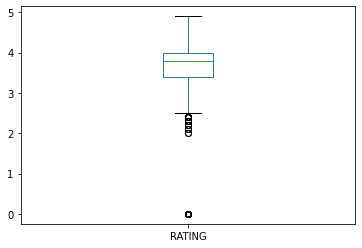

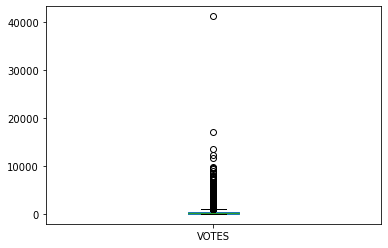

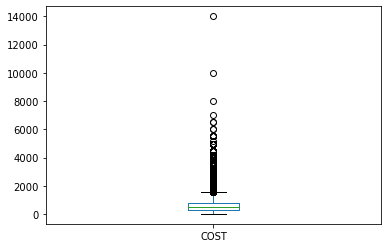

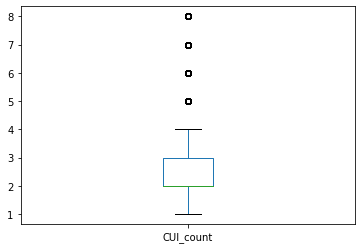

In [38]:
#box plot to detect outliers
plt.figure()
for i in ds_train.columns:
    ds_train.boxplot([i],grid=False)
    plt.show()

we can see that outliers are present in all the columns hence we have to treat them.

In [39]:
#removing outliers
from scipy.stats import zscore
z_score=abs(zscore(ds_train))
print(ds_train.shape)
ds_train_final=ds_train.loc[(z_score<3).all(axis=1)]
print(ds_train_final.shape)

(12690, 4)
(12107, 4)


In [40]:
ds_train=ds_train_final
ds_train.shape

(12107, 4)

In [41]:
ds_train

,RATING,VOTES,COST,CUI_count
0,3.6,49.0,1200,3
1,4.2,30.0,1500,3
2,3.8,221.0,800,4
3,4.1,24.0,800,2
4,3.8,165.0,300,1
...,...,...,...,...
12685,3.8,546.0,500,3
12686,4.3,1214.0,1800,2
12687,4.0,608.0,1300,4
12688,3.5,32.0,400,4


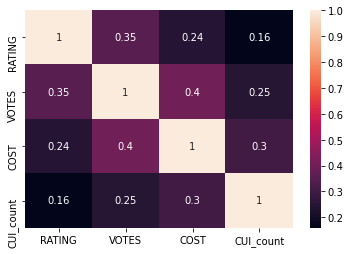

In [42]:
#lets check the correlation
sns.heatmap(ds_train.corr(),annot=True)

COST is having higher correlation with votes.

### Model Training

In [43]:
#seperating input variables
ds_x=ds_train.drop(columns='COST',axis=1)
ds_x

,RATING,VOTES,CUI_count
0,3.6,49.0,3
1,4.2,30.0,3
2,3.8,221.0,4
3,4.1,24.0,2
4,3.8,165.0,1
...,...,...,...
12685,3.8,546.0,3
12686,4.3,1214.0,2
12687,4.0,608.0,4
12688,3.5,32.0,4


In [44]:
y=ds_train['COST']
y

0        1200
1        1500
2         800
3         800
4         300
         ... 
12685     500
12686    1800
12687    1300
12688     400
12689     600
Name: COST, Length: 12107, dtype: int64

In [45]:
# Using standard scaler we standardise the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(ds_x)
x=pd.DataFrame(x,columns=ds_x.columns)

In [46]:
#splitting the input and target variable into test and train data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=47)
print(x_train.shape,'\t',x_test.shape)
print('\n')
print(y_train.shape,'\t',y_test.shape)

(9080, 3) 	 (3027, 3)


(9080,) 	 (3027,)


In [47]:
#importing libraries for models and error metrics
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#importing boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
 
#importing cross validation and grid search cv
from sklearn.model_selection import GridSearchCV,cross_val_score


In [48]:
#creating a for loop for all the models
model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print('score of ',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Metrics:')
    print('mean absolute error:',mean_absolute_error(y_test,predm))
    print('mean squared error:',mean_squared_error(y_test,predm))
    print('r2 score:',r2_score(y_test,predm))
    print('END OF THE MODEL----------------------------------- ')
    print('\n')

score of  LinearRegression() is: 0.21895420778209063
Metrics:
mean absolute error: 267.92007189418257
mean squared error: 155637.38180140112
r2 score: 0.19651678498955827
END OF THE MODEL----------------------------------- 


score of  Lasso() is: 0.2189441987812777
Metrics:
mean absolute error: 267.9365781227609
mean squared error: 155620.92148468122
r2 score: 0.19660176192790757
END OF THE MODEL----------------------------------- 


score of  Ridge() is: 0.21895420634055063
Metrics:
mean absolute error: 267.9209183930972
mean squared error: 155637.11671483508
r2 score: 0.19651815350786572
END OF THE MODEL----------------------------------- 


score of  ElasticNet() is: 0.2036953465201854
Metrics:
mean absolute error: 273.3840137457713
mean squared error: 157662.74597501912
r2 score: 0.18606077436441082
END OF THE MODEL----------------------------------- 


score of  SVR() is: 0.11501830204341534
Metrics:
mean absolute error: 255.69367426882164
mean squared error: 174142.13156473255
r

In [49]:
#lets check the cross validation scores
model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='r2')
    print('Model:',m)
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('Standard Deviation:',score.std())
    print('#########################################################')
    print('\n')

Model: LinearRegression()
Score: [0.24451169 0.19438054 0.22343675 0.22974332 0.20217783 0.23935038
 0.17656705 0.22060683 0.19840184 0.19453978]
Mean Score: 0.2123715996810196
Standard Deviation: 0.021155516130302265
#########################################################


Model: Lasso()
Score: [0.24425198 0.19456843 0.22378092 0.22957123 0.20223372 0.23910217
 0.17662539 0.22041542 0.19835947 0.19478562]
Mean Score: 0.21236943517667634
Standard Deviation: 0.02103500150734201
#########################################################


Model: Ridge()
Score: [0.24450914 0.19438322 0.22343969 0.22974304 0.20217801 0.23934729
 0.17656815 0.22060506 0.19840163 0.19454195]
Mean Score: 0.21237171748480427
Standard Deviation: 0.021154203977877373
#########################################################


Model: ElasticNet()
Score: [0.21965119 0.18801773 0.21595993 0.21177446 0.18827228 0.21377522
 0.16722404 0.20011227 0.18423351 0.18668533]
Mean Score: 0.19757059558461781
Standard Deviat

Of the above models gradient boosting regressor has the best r2 score and we can consider it as the model for predicting cost.

In [50]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
print('score:',gbr.score(x_train,y_train))
predgbr=gbr.predict(x_test)
print('\n')
print('mean absolute error:',mean_absolute_error(y_test,predgbr))
print('mean squared error:',mean_squared_error(y_test,predgbr))
print('r2 score:',r2_score(y_test,predgbr))

score: 0.30249758344899635


mean absolute error: 260.94196986324016
mean squared error: 150193.62196791515
r2 score: 0.22462037811177704


### Test data

In [51]:
ds_x=ds_test
ds_x

,RATING,VOTES,CUI_count
0,4.3,564.0,4
1,4.2,61.0,4
2,3.8,350.0,4
3,3.8,1445.0,1
4,3.6,23.0,2
...,...,...,...
4226,3.9,287.0,3
4227,4.3,469.0,5
4228,3.7,53.0,2
4229,0.0,0.0,2


In [52]:
#applying standard scaling
x=sc.transform(ds_x)
x=pd.DataFrame(x,columns=ds_x.columns)

In [53]:
#predicting the output
Predictgbr=gbr.predict(x)

In [54]:
#predicted output
pd.DataFrame(Predictgbr)

,0
0,1104.005132
1,811.890392
2,636.245290
3,704.836321
4,384.397948
...,...
4226,629.286969
4227,1090.404846
4228,416.695611
4229,366.424588


## Saving the model and result

In [55]:
#saving the GBR model
import joblib
joblib.dump(gbr,'Food_cost.pkl')

['Food_cost.pkl']

In [56]:
#saving the output to csv file
pred_OP=pd.DataFrame(Predictgbr)
pred_OP.to_csv('Food_Costs_predictions.csv')